In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\MERINA ANGEL\\Downloads\\train.csv') #reading the csv file

In [3]:
df.head() #printing 5 rows of df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.dtypes #printing the data types of df columns

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#description of different columns
#PassengerId      id of the passengers
#Survived         how many are survived 
#Pclass           passenger class
#Name            name
#Sex             male or female
#Age            age of passengers
#SibSp            spouse
#Parch            parent and child
#Ticket          ticket details
#Fare           charges
#Cabin           cabin number
#Embarked        Southampton, Cherbourg, and Queenstown(where the travellers have loaded from)
# survival	Survival	0 = No, 1 = Yes
# pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
# sex	Sex

In [6]:
df['Embarked'].value_counts() #unique values

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df.isnull().sum() #null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.shape  #rows and columns

(891, 12)

In [9]:
df['Survived'].value_counts()  #target columns unique values

0    549
1    342
Name: Survived, dtype: int64

In [10]:
#how many are survived related to sex
df[['Survived','Sex']].value_counts()

Survived  Sex   
0         male      468
1         female    233
          male      109
0         female     81
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

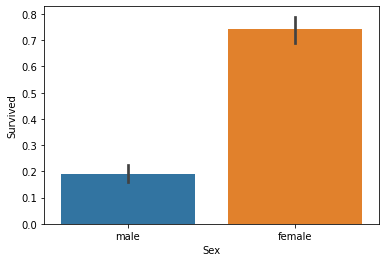

In [11]:
sns.barplot(x=df['Sex'],y=df['Survived'],data=df, orient='v' )
#relation between sex and survived using barplot

Text(0, 0.5, 'Fare')

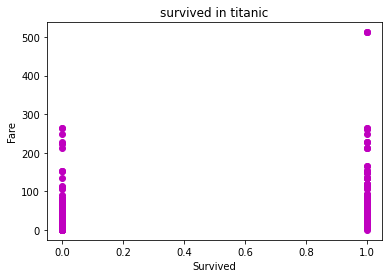

In [12]:
plt.scatter(x=df['Survived'],y=df['Fare'],color='m')

plt.title("survived in titanic")

plt.xlabel("Survived")

plt.ylabel("Fare")  #relation between survived and fare columns using scatter

In [13]:
df.corr()  #knowing the relation between numeric columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

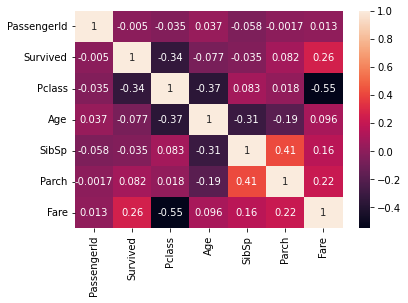

In [14]:
sns.heatmap(df.corr(),annot=True) #heatmap of corr columns

<AxesSubplot:>

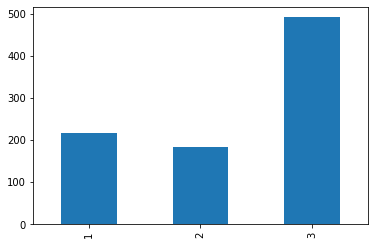

In [15]:
df['Pclass'].value_counts().sort_index().plot.bar()  #barplot of pclass

C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

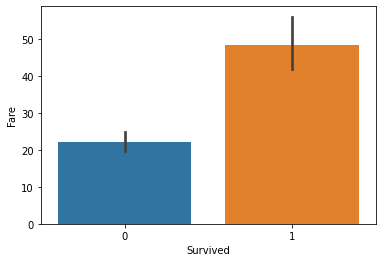

In [16]:
sns.barplot(df['Survived'],df['Fare'])  #relation between survived and fare

Text(0, 0.5, 'Age')

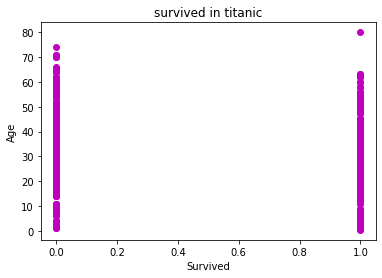

In [17]:
plt.scatter(x=df['Survived'],y=df['Age'],color='m')

plt.title("survived in titanic")

plt.xlabel("Survived")

plt.ylabel("Age")  #relation between survive and age using scatter

# Data cleaning(EDA)
handling with missing values,droping unwanted columns and outliers treatment

In [20]:
df['Sex'].value_counts()  #checking unique values of sex columns

male      577
female    314
Name: Sex, dtype: int64

In [21]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True) #dropping unncessary columns

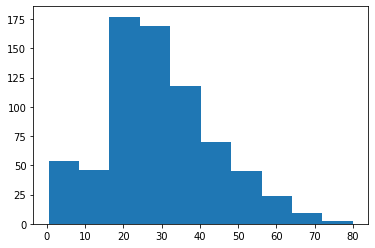

In [22]:
#plotting for age using histogram
plt.hist(df['Age'])
plt.show()

In [23]:
df['Pclass'].value_counts()  #uniqu values of pclass column

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
print("class 1 mean age: ",df[df['Pclass']== 1]['Age'].mean()) #according to pclass1 , age getting replaced with their mean

class 1 mean age:  38.233440860215055


In [25]:
print("class 2 mean age: ",df[df['Pclass']== 2]['Age'].mean())#according to pclass2 , age getting replaced with their mean

class 2 mean age:  29.87763005780347


In [26]:
print("class 3 mean age: ",df[df['Pclass']== 3]['Age'].mean())#according to pclass3 , age getting replaced with their mean

class 3 mean age:  25.14061971830986


In [27]:
mean=df.groupby('Pclass')['Age'].mean() #grouping the pclasses with age according to their mean

In [28]:
mean

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [ ]:
#df['Age'].fillna(value=mean)

In [29]:
def agee(cols):
    Age    = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age #filling according to their mean related to their class and age

In [30]:
df.isnull().sum() #null values

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [31]:
df['Age'] = df[['Age', 'Pclass']].apply(agee, axis=1) #applying the cell 29 to the related column(age)

In [32]:
df.isnull().sum() #we can see age column null values are replace with their mean

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [33]:
df.dropna(inplace=True) #dropping null values has their are only two left in embarked

In [34]:
df.isnull().sum() #null values are removed

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# one hot encoding

In [35]:
df=pd.get_dummies(df) #converting the categorical column to numeric

In [36]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,25.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [37]:
df.dtypes#checking the data types

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

# outliers treatment 

{'whiskers': [<matplotlib.lines.Line2D at 0x1898376b3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1898376b970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1898376b100>,
 'medians': [<matplotlib.lines.Line2D at 0x1898376bdf0>,
 'fliers': [<matplotlib.lines.Line2D at 0x18983774100>,
 'means': []}

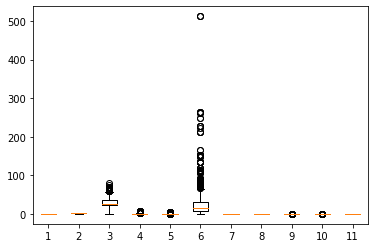

In [38]:
plt.boxplot(df) #checking outliers 

#age column -> outliers treatment

In [39]:
df['Age'].value_counts()  

25.00    159
38.00     40
29.00     31
24.00     30
22.00     27
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

In [40]:
q1=df.quantile(0.25)
q1 #quartile 1 of df

Survived       0.0000
Pclass         2.0000
Age           22.0000
SibSp          0.0000
Parch          0.0000
Fare           7.8958
Sex_female     0.0000
Sex_male       0.0000
Embarked_C     0.0000
Embarked_Q     0.0000
Embarked_S     0.0000
Name: 0.25, dtype: float64

In [41]:
q3=df.quantile(0.75)
q3#quartile 3 of df

Survived       1.0
Pclass         3.0
Age           36.5
SibSp          1.0
Parch          0.0
Fare          31.0
Sex_female     1.0
Sex_male       1.0
Embarked_C     0.0
Embarked_Q     0.0
Embarked_S     1.0
Name: 0.75, dtype: float64

In [42]:
IQR=q3-q1
IQR #inter quartile range of df

Survived       1.0000
Pclass         1.0000
Age           14.5000
SibSp          1.0000
Parch          0.0000
Fare          23.1042
Sex_female     1.0000
Sex_male       1.0000
Embarked_C     0.0000
Embarked_Q     0.0000
Embarked_S     1.0000
dtype: float64

In [43]:
lf = q1 - (1.5 * IQR)

uf = q3 + (1.5 * IQR)

lf
#upper and lower fence calculating

Survived      -1.5000
Pclass         0.5000
Age            0.2500
SibSp         -1.5000
Parch          0.0000
Fare         -26.7605
Sex_female    -1.5000
Sex_male      -1.5000
Embarked_C     0.0000
Embarked_Q     0.0000
Embarked_S    -1.5000
dtype: float64

In [44]:
uf

Survived       2.5000
Pclass         4.5000
Age           58.2500
SibSp          2.5000
Parch          0.0000
Fare          65.6563
Sex_female     2.5000
Sex_male       2.5000
Embarked_C     0.0000
Embarked_Q     0.0000
Embarked_S     2.5000
dtype: float64

In [45]:
print(df.value_counts()) #unique values in df columns

Survived  Pclass  Age   SibSp  Parch  Fare    Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0         3       25.0  0      0      7.8958  0           1         0           0           1             14
                                      8.0500  0           1         0           0           1             12
                                      7.7500  0           1         0           1           0              9
1         3       25.0  0      0      7.7500  1           0         0           1           0              7
0         2       29.0  0      0      0.0000  0           1         0           0           1              6
                                                                                                          ..
          3       23.0  0      0      9.2250  0           1         0           0           1              1
                  23.5  0      0      7.2292  0           1         1           0           0              1
                  24.0  0

{'whiskers': [<matplotlib.lines.Line2D at 0x189852c9660>,
 'caps': [<matplotlib.lines.Line2D at 0x189852c9c00>,
 'boxes': [<matplotlib.lines.Line2D at 0x189852c9390>],
 'medians': [<matplotlib.lines.Line2D at 0x189852ca1a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x189852ca470>],
 'means': []}

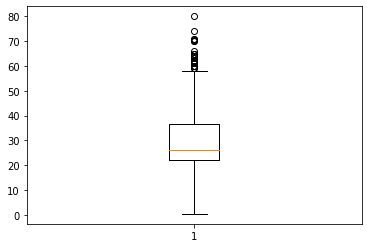

In [46]:
plt.boxplot(df['Age']) #before outlier treatment

In [47]:
df["Age"].mean() #finding mean

29.20604049493813

In [48]:
df["Age"] = np.where(df["Age"] <0,29,df['Age']) #lowerfence
df["Age"] = np.where(df["Age"] >58,29 ,df['Age']) #upperfence
print(df['Age'].skew())

0.10112402114352612


{'whiskers': [<matplotlib.lines.Line2D at 0x18985313400>,
 'caps': [<matplotlib.lines.Line2D at 0x189853139a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18985313250>],
 'medians': [<matplotlib.lines.Line2D at 0x18985313f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x18985344250>],
 'means': []}

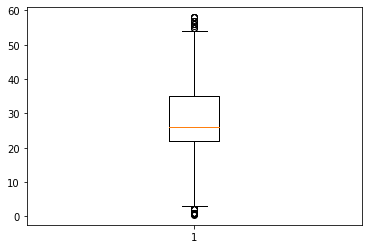

In [49]:
plt.boxplot(df['Age']) #after outlier treatment

#parch -> outliers treatment

In [50]:
#plt.boxplot(df)

In [51]:
df["Parch"].mean()

0.38245219347581555

In [52]:
df["Parch"] = np.where(df["Parch"] <0,0.3,df['Parch']) #lf
df["Parch"] = np.where(df["Parch"] >0,0.3 ,df['Parch'])#uf
print(df['Parch'].skew())

1.222226187962523


{'whiskers': [<matplotlib.lines.Line2D at 0x189853951e0>,
 'caps': [<matplotlib.lines.Line2D at 0x18985395780>,
 'boxes': [<matplotlib.lines.Line2D at 0x18985395030>],
 'medians': [<matplotlib.lines.Line2D at 0x18985395d20>],
 'fliers': [<matplotlib.lines.Line2D at 0x18985395ff0>],
 'means': []}

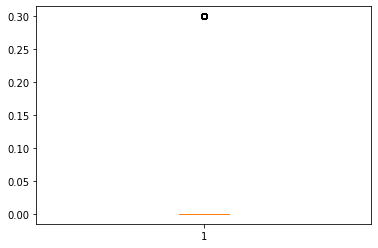

In [53]:
plt.boxplot(df['Parch']) #after outliers treatment

In [54]:
print(df['Parch'].value_counts())
print(df['Age'].value_counts())

0.0    676
0.3    213
Name: Parch, dtype: int64
25.0    159
29.0     58
38.0     40
24.0     30
22.0     27
       ... 
20.5      1
55.5      1
12.0      1
14.5      1
34.5      1
Name: Age, Length: 75, dtype: int64


In [ ]:
#plt.boxplot(df)

#sibsp -> outliers treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x189853df1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x189853df790>,
 'boxes': [<matplotlib.lines.Line2D at 0x189853def20>],
 'medians': [<matplotlib.lines.Line2D at 0x189853dfd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x18985418040>],
 'means': []}

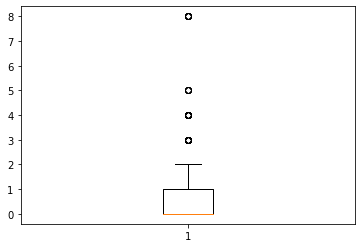

In [55]:
plt.boxplot(df['SibSp']) #before outlier treatment

In [56]:
df['SibSp'].mean() #finding mean

0.5241844769403825

In [57]:
df["SibSp"] = np.where(df["SibSp"] <0,0.5,df['SibSp'])
df["SibSp"] = np.where(df["SibSp"] >2.0,0.5,df['SibSp'])
print(df['SibSp'].skew()) #using np.where replacing the outliers with their mean


#index = df[(df['SibSp'] >= 2)|(df['SibSp'] <= -1.5)].index
#df.replace(index,0.5,inplace=True)

1.4212922935634238


In [58]:
df["SibSp"].value_counts() #unique values

0.0    606
1.0    209
0.5     46
2.0     28
Name: SibSp, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x18985459b10>,
 'caps': [<matplotlib.lines.Line2D at 0x1898545a0b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x189854598a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1898545a650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1898545a920>],
 'means': []}

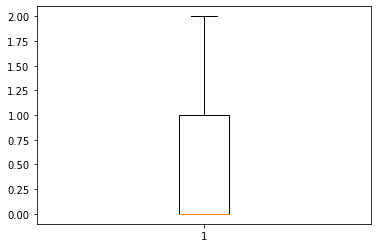

In [59]:
plt.boxplot(df['SibSp'])#after outliers treatment

In [ ]:
#plt.boxplot(df)

fare-> outliers treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x189854dc1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x189854dc760>,
 'boxes': [<matplotlib.lines.Line2D at 0x189854a7fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x189854dcd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x189854dcfd0>],
 'means': []}

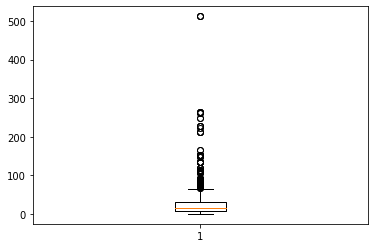

In [60]:
plt.boxplot(df['Fare']) #before outlier treatment

In [61]:
df['Fare'].mean() #finding mean

32.09668087739032

In [62]:
df["Fare"] = np.where(df["Fare"] <0,32,df['Fare'])
df["Fare"] = np.where(df["Fare"] >100,32,df['Fare'])
print(df['Fare'].skew())
#replacing outliers with their mean

1.6237473195873846


{'whiskers': [<matplotlib.lines.Line2D at 0x189855258a0>,
 'caps': [<matplotlib.lines.Line2D at 0x18985525e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x189855256f0>],
 'medians': [<matplotlib.lines.Line2D at 0x18985526410>],
 'fliers': [<matplotlib.lines.Line2D at 0x189855266e0>],
 'means': []}

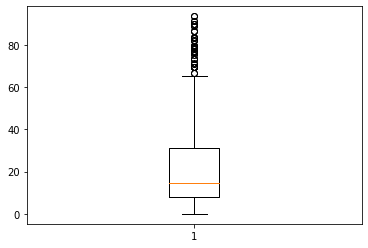

In [63]:
plt.boxplot(df['Fare']) #after outlier treatment

In [ ]:
#plt.boxplot(df)

embarked_c-> outlier treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x1898557ae60>,
 'caps': [<matplotlib.lines.Line2D at 0x1898557b400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1898557ab90>],
 'medians': [<matplotlib.lines.Line2D at 0x1898557b9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1898557bc70>],
 'means': []}

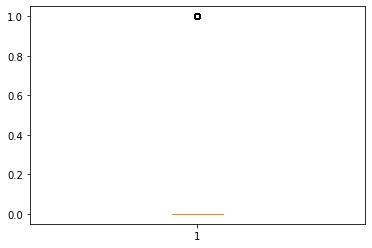

In [64]:
plt.boxplot(df['Embarked_C']) #before outlier treatment

In [65]:
df["Embarked_C"].mean() #finding mean

0.1889763779527559

In [66]:
df["Embarked_C"] = np.where(df["Embarked_C"] <0,0.1,df['Embarked_C'])
df["Embarked_C"] = np.where(df["Embarked_C"] >0,0.1,df['Embarked_C'])
print(df['Embarked_C'].skew())
#replacing the outliers with their mean

1.5916097892471588


{'whiskers': [<matplotlib.lines.Line2D at 0x189855f4880>,
 'caps': [<matplotlib.lines.Line2D at 0x189855f4e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x189855f45b0>],
 'medians': [<matplotlib.lines.Line2D at 0x189855f53f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x189855f56c0>],
 'means': []}

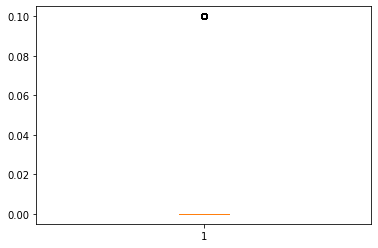

In [67]:
plt.boxplot(df['Embarked_C']) #after replacement

In [ ]:
#plt.boxplot(df)

embarked_q-> outlier treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x1898372a920>,
 'caps': [<matplotlib.lines.Line2D at 0x1898372bbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1898372aec0>],
 'medians': [<matplotlib.lines.Line2D at 0x1898372beb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1898372b100>],
 'means': []}

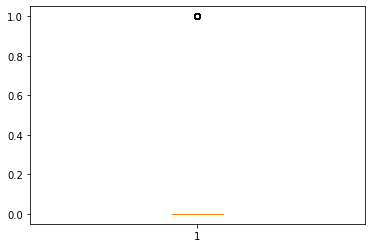

In [69]:
plt.boxplot(df['Embarked_Q']) #after outlier treatment

In [70]:
df["Embarked_Q"].mean() #finding mean

0.08661417322834646

In [71]:
df["Embarked_Q"] = np.where(df["Embarked_Q"] <0,0.08,df['Embarked_Q'])
df["Embarked_Q"] = np.where(df["Embarked_Q"] >0,0.08,df['Embarked_Q'])
print(df['Embarked_Q'].skew()) #replacing outliers with mean

2.944406077089463


{'whiskers': [<matplotlib.lines.Line2D at 0x1898561abf0>,
 'caps': [<matplotlib.lines.Line2D at 0x1898561b190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1898561a920>,
 'medians': [<matplotlib.lines.Line2D at 0x1898561b730>,
 'fliers': [<matplotlib.lines.Line2D at 0x1898561ba00>,
 'means': []}

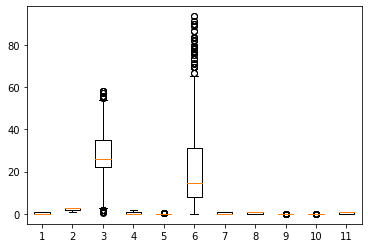

In [72]:
plt.boxplot(df) #after replacement of all columns outliers

unique values of the various columns

In [73]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 25.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 29.  , 31.  , 34.  , 15.  ,
       28.  ,  8.  , 19.  , 40.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,  0.83,
       30.  , 33.  , 23.  , 24.  , 46.  , 37.  , 47.  , 14.5 , 32.5 ,
       12.  ,  9.  , 36.5 , 51.  , 55.5 , 40.5 , 44.  ,  1.  , 56.  ,
       50.  , 36.  , 45.5 , 20.5 , 41.  , 52.  , 23.5 ,  0.92, 43.  ,
       10.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 24.5 ,  6.  ,  0.67,
       30.5 ,  0.42, 34.5 ])

In [74]:
df['Parch'].unique()

array([0. , 0.3])

In [75]:
df['SibSp'].unique()

array([1. , 0. , 0.5, 2. ])

In [76]:
df['Fare'].unique()

array([ 7.25  , 71.2833,  7.925 , 53.1   ,  8.05  ,  8.4583, 51.8625,
       21.075 , 11.1333, 30.0708, 16.7   , 26.55  , 31.275 ,  7.8542,
       16.    , 29.125 , 13.    , 18.    ,  7.225 , 26.    ,  8.0292,
       35.5   , 31.3875, 32.    ,  7.8792,  7.8958, 27.7208,  7.75  ,
       10.5   , 82.1708, 52.    ,  7.2292, 11.2417,  9.475 , 21.    ,
       41.5792, 15.5   , 21.6792, 17.8   , 39.6875,  7.8   , 76.7292,
       61.9792, 27.75  , 46.9   , 83.475 , 27.9   , 15.2458,  8.1583,
        8.6625, 73.5   , 14.4542, 56.4958,  7.65  , 29.    , 12.475 ,
        9.    ,  9.5   ,  7.7875, 47.1   , 15.85  , 34.375 , 61.175 ,
       20.575 , 34.6542, 63.3583, 23.    , 77.2875,  8.6542,  7.775 ,
       24.15  ,  9.825 , 14.4583,  7.1417, 22.3583,  6.975 ,  7.05  ,
       14.5   , 15.0458, 26.2833,  9.2167, 79.2   ,  6.75  , 11.5   ,
       36.75  ,  7.7958, 12.525 , 66.6   ,  7.3125, 61.3792,  7.7333,
       69.55  , 16.1   , 15.75  , 20.525 , 55.    , 25.925 , 33.5   ,
       30.6958, 25.4

In [77]:
df.shape #rows and columns 

(889, 11)

# Imbalance data handling and standardization of the data

In [78]:
df['Survived'].value_counts() #unique columns to balance the imbalance data

0    549
1    340
Name: Survived, dtype: int64

In [79]:
from sklearn.preprocessing import StandardScaler #importing standard scaler to standardize the data

In [80]:
from imblearn.combine import SMOTEENN #smoteenn to balance the imbalance data

In [81]:
sm=SMOTEENN() #assigning the smoteenn to sm

In [82]:
x=df[['Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']]
y=df['Survived']
y #separating dependent and independent columns

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [83]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1.0,0.0,7.2500,0,1,0.0,0.00,1
1,1,38.0,1.0,0.0,71.2833,1,0,0.1,0.00,0
2,3,26.0,0.0,0.0,7.9250,1,0,0.0,0.00,1
3,1,35.0,1.0,0.0,53.1000,1,0,0.0,0.00,1
4,3,35.0,0.0,0.0,8.0500,0,1,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0.0,0.0,13.0000,0,1,0.0,0.00,1
887,1,19.0,0.0,0.0,30.0000,1,0,0.0,0.00,1
888,3,25.0,1.0,0.3,23.4500,1,0,0.0,0.00,1
889,1,26.0,0.0,0.0,30.0000,0,1,0.1,0.00,0


In [84]:
xsm_train,ysm_train=sm.fit_resample(x,y)#fitting into smoteenn the x,y

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xsm_train,ysm_train,test_size=0.2)  #train test_split

In [86]:
x_train.shape #r,c of x_train

(475, 10)

In [87]:
y_train.shape #r,c of y_train

(475,)

In [88]:
i=StandardScaler() #assigning the standard scaler to i

In [89]:
i.fit_transform(x_train,y_train) #fitting and transforming the training data into standardscaler

array([[ 0.91707137, -0.9642886 , -0.63017021, ..., -0.49893781,
        -0.3184365 ,  0.67275507],
       [ 0.91707137, -2.3488086 ,  2.02650405, ...,  0.44507   ,
        -0.3184365 , -1.48642506],
       [-1.39385119,  1.60484086, -0.63017021, ...,  2.14162057,
        -0.3184365 , -1.48642506],
       ...,
       [ 0.91707137, -0.41376086, -0.63017021, ..., -0.49893781,
        -0.3184365 ,  0.67275507],
       [-0.23838991, -2.33947465, -0.61405536, ...,  2.13074894,
        -0.3184365 , -1.48642506],
       [-0.23838991, -0.23025161,  3.28388974, ..., -0.49893781,
        -0.3184365 ,  0.67275507]])

In [90]:
i.transform(x_test) #transforming the test data

array([[-1.39385119,  0.77904925,  1.32685976, ..., -0.49893781,
        -0.3184365 ,  0.67275507],
       [ 0.91707137, -0.41376086, -0.63017021, ..., -0.49893781,
        -0.3184365 ,  0.67275507],
       [-0.23838991, -0.13849699, -0.63017021, ..., -0.49893781,
        -0.3184365 ,  0.67275507],
       ...,
       [-1.39385119,  1.11720035,  0.65620043, ..., -0.49893781,
        -0.3184365 ,  0.67275507],
       [ 0.91707137, -0.13849699, -0.63017021, ..., -0.49893781,
         3.22798501, -1.48642506],
       [ 0.91707137, -0.23025161, -0.63017021, ..., -0.49893781,
        -0.3184365 ,  0.67275507]])

In [91]:
y_train.value_counts()#unique values of y_train

1    259
0    216
Name: Survived, dtype: int64

# model building

# logistic regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [126]:
lr=LogisticRegression() #assigning the model to lr

In [127]:
lr.fit(x_train,y_train) #fitting training data

C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [128]:
y_pred=lr.predict(x_test) #predicting on test data

In [129]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [130]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\n')
print(accuracy_score(y_test, y_pred))
print('\n')
print( classification_report(y_test,y_pred))

[[54  6]
 [ 5 54]]


0.907563025210084


              precision    recall  f1-score   support

           0       0.92      0.90      0.91        60
           1       0.90      0.92      0.91        59

    accuracy                           0.91       119
   macro avg       0.91      0.91      0.91       119
weighted avg       0.91      0.91      0.91       119



In [131]:
#hyper parameter tunning
parameters={'penalty':['l1', 'l2', 'elasticnet', 'none'],'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
regcv=GridSearchCV(lr,param_grid=parameters,cv=5)

In [134]:
regcv.fit(x_train,y_train) #fitting the training data to gridsearch cv

C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The ma

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [135]:
regcv.best_score_ #best_score

0.9157894736842105

In [136]:
regcv.best_params_ #best parameter

{'penalty': 'l1', 'solver': 'liblinear'}

In [137]:
print (f'Accuracy - : {regcv.score(x_train,y_train):.3f}') #accuracy

Accuracy - : 0.916


# knn

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
knn=KNeighborsClassifier() #assigning model to knn

In [140]:
knn.fit(x_train,y_train) #fitting the training dataset

KNeighborsClassifier()

In [141]:
y_pred= knn.predict(x_test) #predicting the test data

In [142]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [143]:
confusion_matrix(y_test,y_pred)

array([[57,  3],
       [ 1, 58]], dtype=int64)

In [144]:
accuracy_score(y_test,y_pred)

0.9663865546218487

In [145]:
err_rate=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)#kvalue
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    err_rate.append(np.mean(y_pred != y_test))#it helps to set the k value

Text(0, 0.5, 'ER')

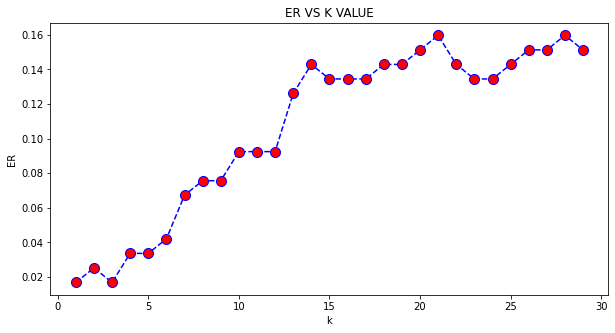

In [146]:
#plotting the graph of er vs k
plt.figure(figsize=(10,5))
plt.plot(range(1,30),err_rate,color='Blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('ER VS K VALUE')  #where er is less we select it as k value
plt.xlabel('k')
plt.ylabel('ER')   

In [153]:
knn= KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print('with k-1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))# finding the best accuracy according to k value

with k-1


[[58  2]
 [ 0 59]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.97      1.00      0.98        59

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



In [154]:
knn= KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print('with k-3')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))# finding the best accuracy according to k value

with k-3


[[58  2]
 [ 0 59]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.97      1.00      0.98        59

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



In [155]:
parameters={'weights' : ['uniform', 'distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [156]:
knncv=GridSearchCV(knn,param_grid=parameters,cv=5)

In [157]:
knncv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']})

In [158]:
knncv.best_score_

0.9557894736842105

In [159]:
knncv.best_params_

{'algorithm': 'auto', 'weights': 'distance'}

# decision tree regressor

In [160]:
from sklearn.tree import DecisionTreeClassifier
a=DecisionTreeClassifier() #assigning the model to a

In [161]:
a.fit(x_train,y_train) #fitting the training data

DecisionTreeClassifier()

In [162]:
y_pred=a.predict(x_test) #prediction on test data

In [163]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [164]:
accuracy_score(y_test,y_pred) #accuracy score

0.957983193277311

In [165]:
confusion_matrix(y_test,y_pred)

array([[57,  3],
       [ 2, 57]], dtype=int64)

In [166]:
parameter={'criterion' : ["gini", "entropy", "log_loss"],'splitter' : ["best", "random"]}

In [167]:
regcv=GridSearchCV(a,param_grid=parameter)

In [168]:
regcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [169]:
regcv.best_score_

0.9473684210526316

In [170]:
regcv.best_params_

{'criterion': 'log_loss', 'splitter': 'random'}

# naive bayes classifier

In [171]:
from sklearn.naive_bayes import GaussianNB

In [172]:
naive=GaussianNB() #assigning model to naive variabe

In [173]:
naive.fit(x_train,y_train) #fitting training data to the model

GaussianNB()

In [174]:
y_pred=naive.predict(x_test) #prediction on test data

In [175]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [176]:
accuracy_score(y_test,y_pred) #accuracy

0.8823529411764706

# Random forest classifier

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
rf=RandomForestClassifier() #assigning model to rf

In [179]:
rf.fit(x_train,y_train)#fitting training data to rf

RandomForestClassifier()

In [180]:
y_pred=rf.predict(x_test) #prediction on test data

In [181]:
parameters={'n_estimators':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'criterion' : ["gini", "entropy", "log_loss"]
}
regcv=GridSearchCV(rf,param_grid=parameters,cv=5)

In [182]:
regcv

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20]})

In [183]:
regcv.fit(xsm_train,ysm_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20]})

In [184]:
regcv.best_params_

{'criterion': 'gini', 'n_estimators': 7}

In [185]:
regcv.best_score_

0.9663580686511892

# svc

In [186]:
from sklearn.svm import SVC

In [187]:
svc=SVC()

In [189]:
svc.svm = SVC(kernel='linear') 
svc.svm.fit(x_train,y_train)
preds = svc.svm.predict(x_test)
accuracy_score(y_test, preds)

0.8991596638655462

In [194]:
#parameters={'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],'gamma' : ['scale', 'auto']}

In [195]:
#regcv=GridSearchCV(svc,param_grid=parameters,cv=5)

In [196]:
#regcv.fit(x_train,y_train)

# ACCURACY SCORES OF DIFFERENT MODELS
lr = 91


knn= 98


dc = 95


naive=88


rf= 96


svc= 90